## Univariate Selection

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import chi2          # A Statistical method to depict relevancy
from sklearn.feature_selection import SelectKBest   # Pick out K best features

In [2]:
#Load Dataset
data = pd.read_csv("datset/train.csv")

In [3]:
data.shape

(2000, 21)

In [4]:
data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [5]:
# Separating Features and Output

X = data.iloc[:, 0:20]  # 20 is included in iloc
Y = data.iloc[:, -1]

In [6]:
X.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  
0        0             0     1  
1        1             1     0  
2        1             1     0  
3        1             0     0  
4        1             1     0

In [7]:
Y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

## Apply KBest : To Pick Top 10 Features

In [8]:
# Creating an object first

best_features = SelectKBest(score_func = chi2, k = 10)

In [9]:
# Now we will fit parameters in X and find out the relevancy of each feature using fit method

best_fit = best_features.fit(X, Y)

In [10]:
type(best_fit)

sklearn.feature_selection._univariate_selection.SelectKBest

In [11]:
# Print out relevancy score
best_fit.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [12]:
dfscores = pd.DataFrame(best_fit.scores_)

In [13]:
dfcolumn = pd.DataFrame(X.columns)
dfcolumn

0
0   battery_power
1            blue
2     clock_speed
3        dual_sim
4              fc
5          four_g
6      int_memory
7           m_dep
8       mobile_wt
9         n_cores
10             pc
11      px_height
12       px_width
13            ram
14           sc_h
15           sc_w
16      talk_time
17        three_g
18   touch_screen
19           wifi

In [14]:
# Now concatenate them with scores

feature_score = pd.concat([dfcolumn, dfscores], axis = 1)

feature_score.columns = ["feature", "score"]


In [15]:
feature_score.head()

feature         score
0  battery_power  14129.866576
1           blue      0.723232
2    clock_speed      0.648366
3       dual_sim      0.631011
4             fc     10.135166

In [16]:
# Now bring up the more relevant features

feature_score.sort_values(by = "score", ascending = False, inplace = True)

In [17]:
feature_score

feature          score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878
10             pc       9.186054
9         n_cores       9.097556
18   touch_screen       1.928429
5          four_g       1.521572
7           m_dep       0.745820
1            blue       0.723232
2     clock_speed       0.648366
3        dual_sim       0.631011
19           wifi       0.422091
17        three_g       0.327643

## Visualization

In [18]:
import matplotlib.pyplot as plt

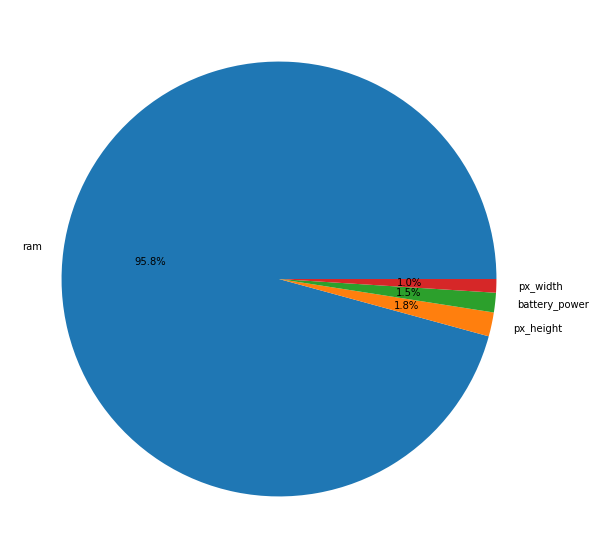

In [19]:
plt.figure(figsize = (20,10))
plt.pie(x = feature_score['score'][:4], labels = feature_score['feature'][:4] , autopct = '%1.1f%%')
plt.plot();

# Another Method : Feature Importance

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
# Creating an object of RandomForestClassifier

model = RandomForestClassifier()

In [22]:
# Training Model

model.fit(X, Y)

RandomForestClassifier()

In [23]:
# Checking out the importance of each feature

model.feature_importances_

array([0.07404814, 0.00601296, 0.02777785, 0.00669711, 0.02451064,
       0.00621136, 0.03479205, 0.02296914, 0.03974808, 0.02237658,
       0.02940089, 0.05475626, 0.05943485, 0.4880653 , 0.02617052,
       0.02775773, 0.0307567 , 0.00529614, 0.00703762, 0.00618008])

In [24]:
Feature_imp = pd.DataFrame(model.feature_importances_, index = X.columns, columns = ["Importance"])

In [25]:
Feature_imp

Importance
battery_power    0.074048
blue             0.006013
clock_speed      0.027778
dual_sim         0.006697
fc               0.024511
four_g           0.006211
int_memory       0.034792
m_dep            0.022969
mobile_wt        0.039748
n_cores          0.022377
pc               0.029401
px_height        0.054756
px_width         0.059435
ram              0.488065
sc_h             0.026171
sc_w             0.027758
talk_time        0.030757
three_g          0.005296
touch_screen     0.007038
wifi             0.006180

In [26]:
Feature_imp.sort_values(by = "Importance", ascending = False, inplace = True)

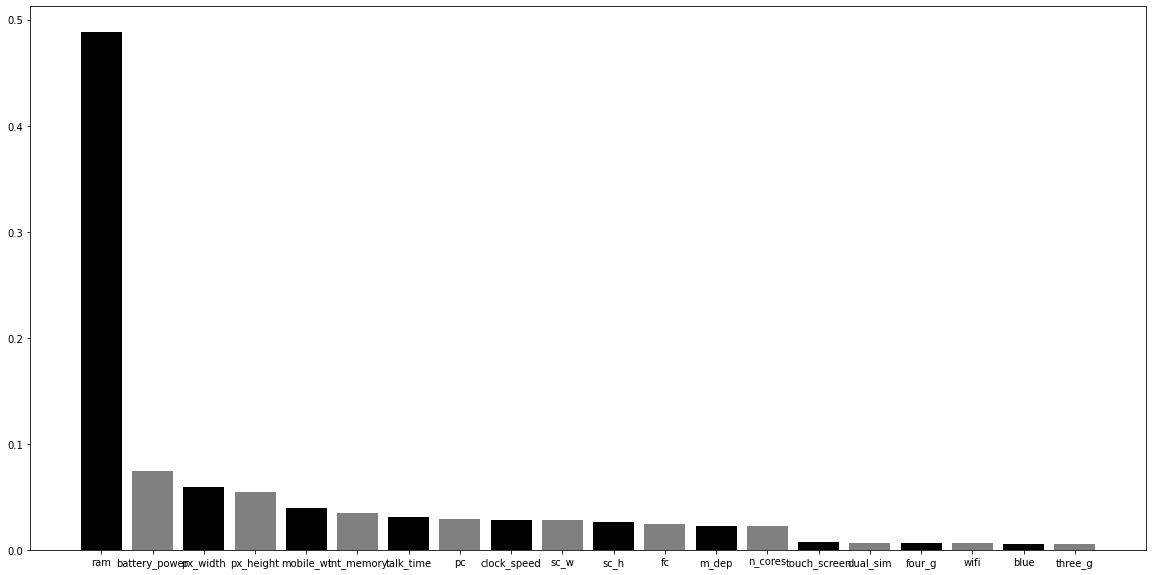

In [27]:
plt.figure(figsize = (20,10))
plt.bar(Feature_imp.index, Feature_imp['Importance'], color = ["black", "gray"])
plt.show()